**1.HR-Analytics Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from google.colab import drive
from scipy import stats
#drive.mount('/drive')

 **2.Load Dataset**

In [2]:
data=pd.read_csv("C:\\Users\\Mahitha\\Downloads\\HR_data.csv")
data.head(2)

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined


*2.0.1 The goal is to predict the probability of the candidate joining the company*

**3.Data**

In [3]:
data.shape

(8995, 18)

In [4]:
data.dtypes[data.dtypes=='object'] # checking categorical type of data

DOJ.Extended                 object
Offered.band                 object
Joining.Bonus                object
Candidate.relocate.actual    object
Gender                       object
Candidate.Source             object
LOB                          object
Location                     object
Status                       object
dtype: object

In [5]:
data.dtypes[data.dtypes=='object'].index

Index(['DOJ.Extended', 'Offered.band', 'Joining.Bonus',
       'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'LOB',
       'Location', 'Status'],
      dtype='object')

**4.checking multi-collinearity(numerical data)**

In [6]:
corr=data.corr()

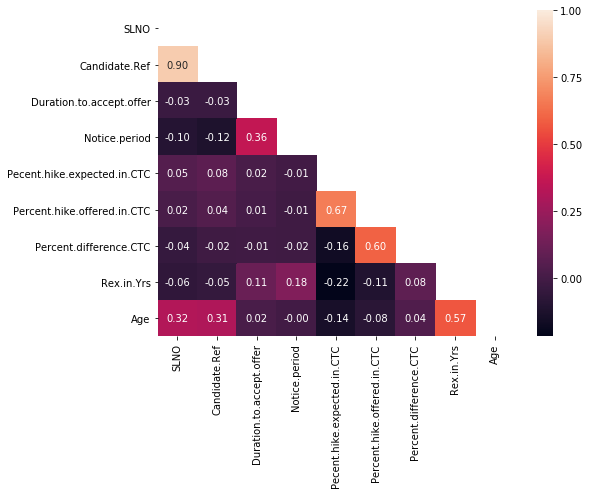

In [7]:
plt.figure(figsize=(8,6))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,fmt='0.2f',mask=mask)
plt.show()

In [8]:
# consider numerical data for cal variance inflation factor
num_col=data.dtypes[data.dtypes=='int64'].index

In [9]:
x_num=data[num_col]
x_num.shape

(8995, 6)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
vif=pd.DataFrame()
vif['Features']=x_num.keys()
vif['VIF Score']=[variance_inflation_factor(x_num.values,i) for i in range(6)]

In [12]:
vif

,Features,VIF Score
0,SLNO,10.948187
1,Candidate.Ref,81.868311
2,Duration.to.accept.offer,1.953816
3,Notice.period,4.707560
4,Rex.in.Yrs,5.873765
5,Age,65.388797


**4.0.1 Creating Dummy Features**

In [13]:
data_num=pd.get_dummies(data,drop_first=True)
data_num.head()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,DOJ.Extended_Yes,...,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Status_Not Joined
0,1,2110407,14,30,-20.79,13.16,42.86,7,34,1,...,0,0,0,0,0,0,1,0,0,0
1,2,2112635,18,30,50.00,320.00,180.00,8,34,0,...,1,0,0,0,0,0,0,0,0,0
2,3,2112838,3,45,42.84,42.84,0.00,4,27,0,...,0,0,0,0,0,0,1,0,0,0
3,4,2115021,26,30,42.84,42.84,0.00,4,34,0,...,0,0,0,0,0,0,1,0,0,0
4,5,2115125,1,120,42.59,42.59,0.00,6,34,1,...,0,0,0,0,0,0,1,0,0,0


**4.0.2 Feature Engineering**

In [14]:
#splitting data into independent and dependent
x=data_num.iloc[:,:-1] #independent
y=data_num.iloc[:,-1]  #dependent

In [15]:
y.value_counts()/len(y)

0    0.813007
1    0.186993
Name: Status_Not Joined, dtype: float64

**-The data is in imbalance state**

In [16]:
import statsmodels.api as sm

In [17]:
model=sm.GLM(y,x).fit()
print(model.summary()) #logistic regression...GLM stands for (generalized linear model)

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Status_Not Joined   No. Observations:                 8995
Model:                            GLM   Df Residuals:                     8959
Model Family:                Gaussian   Df Model:                           35
Link Function:               identity   Scale:                         0.13752
Method:                          IRLS   Log-Likelihood:                -3822.3
Date:                Sat, 14 Mar 2020   Deviance:                       1232.0
Time:                        19:39:18   Pearson chi2:                 1.23e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
SLNO                                -4.46e-06    2.7e-06     -1.649      0.099   -9

In [18]:
features=model.pvalues.sort_values(ascending=True)
features[features<0.025]

Candidate.relocate.actual_Yes         4.476720e-74
Notice.period                         3.569638e-53
Candidate.Source_Employee Referral    6.950800e-13
Location_Chennai                      2.428081e-12
Location_Bangalore                    1.836981e-11
Location_Hyderabad                    3.234541e-10
Location_Noida                        7.290371e-10
Location_Kolkata                      1.463496e-09
Location_Gurgaon                      3.686728e-09
Location_Mumbai                       9.206258e-08
Candidate.Source_Direct               1.851964e-07
Offered.band_E1                       3.757927e-07
LOB_INFRA                             6.895900e-07
Location_Pune                         1.194870e-06
Offered.band_E3                       1.972042e-05
Offered.band_E2                       3.917096e-05
DOJ.Extended_Yes                      6.764918e-04
Age                                   1.342747e-03
LOB_ETS                               2.401145e-03
LOB_MMS                        

In [19]:
selected_features=list(features[features<0.025].index)+ ['Status_Not Joined']

**Selected Features**

In [20]:
print(selected_features)

['Candidate.relocate.actual_Yes', 'Notice.period', 'Candidate.Source_Employee Referral', 'Location_Chennai', 'Location_Bangalore', 'Location_Hyderabad', 'Location_Noida', 'Location_Kolkata', 'Location_Gurgaon', 'Location_Mumbai', 'Candidate.Source_Direct', 'Offered.band_E1', 'LOB_INFRA', 'Location_Pune', 'Offered.band_E3', 'Offered.band_E2', 'DOJ.Extended_Yes', 'Age', 'LOB_ETS', 'LOB_MMS', 'LOB_BFSI', 'Location_Cochin', 'Location_Others', 'Status_Not Joined']


In [21]:
featured_data=data_num[selected_features]

In [22]:
featured_data.to_csv("hrdata_features.csv",index=False)